# Validate the five-dimensional car steering model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mrobotics.models.motion.kinematic import ackermann_car_actuator

In [2]:
plant = ackermann_car_actuator(wheelbase=1.8, tau_steering=0.1, tau_vx=0.5)
def controller(sim_time):
    vx_cmd = 16.0 if sim_time > 5.0 else 20.0
    if sim_time < 2.0:
        steering_angle_cmd = 0.0 
    elif sim_time < 5.0:
        steering_angle_cmd = steering_setpoint
    else:
        steering_angle_cmd = -steering_setpoint
    return vx_cmd, steering_angle_cmd

In [3]:
N_sim = 1000
t_eval = np.linspace(0,10,N_sim)
sampling_period = t_eval[1]-t_eval[0]

state_rec = np.zeros((N_sim, 5),dtype=float)
state_rec[0] = np.array([0.0, 5.0, np.pi/2, np.pi/6, 0.0]) # initial state
cmd = np.zeros((N_sim-1,2),dtype=float)

steering_setpoint =  np.pi/180*25
for i in range(0,N_sim-1):
    state_now = state_rec[i] # just a view

    # prepare the input signals
    sim_time = t_eval[i]
    vx_cmd, steering_angle_cmd = controller(sim_time)
    cmd[i,0] = vx_cmd
    cmd[i,1] = steering_angle_cmd

    """ using RK4 instead of the analytical formula"""
    k1 = plant.ct(state_now, vx_cmd, steering_angle_cmd)
    k2 = plant.ct(state_now+(0.5*sampling_period)*k1, vx_cmd, steering_angle_cmd)
    k3 = plant.ct(state_now+(0.5*sampling_period)*k2, vx_cmd, steering_angle_cmd)
    k4 = plant.ct(state_now+(sampling_period)*k3, vx_cmd, steering_angle_cmd )
    state_rec[i+1] = state_now + (sampling_period/6)*(k1+ 2*k2+ 2*k3+ k4)


## The trajectory of the car position

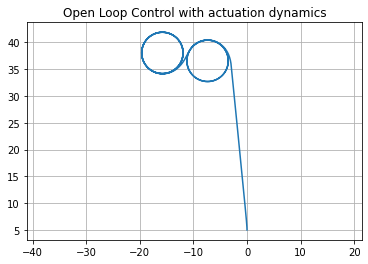

In [4]:
plt.plot(state_rec[:,0],state_rec[:,1])
plt.axis('equal')
plt.grid('major')
plt.title('Open Loop Control with actuation dynamics')
plt.show()

## Inspect the actuator dynamics

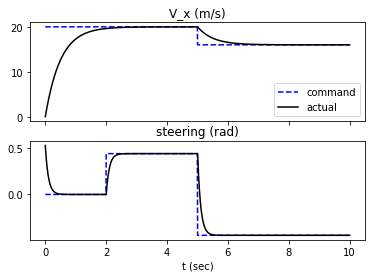

In [5]:
_, axs = plt.subplots(2,1,sharex=True)

axs[0].plot(t_eval[:-1], cmd[:,0], '--b', label="command")
axs[0].plot(t_eval, state_rec[:,4], '-k', label="actual")
axs[0].set_title('V_x (m/s)')
axs[0].legend()


axs[1].plot(t_eval[:-1], cmd[:,1], '--b', label="command")
axs[1].plot(t_eval, state_rec[:,3], '-k', label="actual")
axs[1].set_title('steering (rad)')
# axs[1].legend()
axs[1].set_xlabel('t (sec)')
plt.show()